In [1]:
#Assumptions of the model
#1. Regression residuals are normally distributed
#2. Linear relationship is assumed between dependent and independent variables
#3. Residuals are homoskedastic and approximately rectangular shaped
#4. Absence of multicollinearity is expected, meaning independent variables are not
#5. No autocorrelation of the residuals (relationship between variable's current value and past value)

#Multiple Regression analysis on Korea's GDP growth. After Korean War, Korea was in poverty and experienced rapid GDP growth to become one of the top 15 economies


In [80]:
#Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pylab
import math

from scipy import stats

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline


In [21]:
#Import data into pandas
econ_df = pd.read_excel('korea_data.xlsx')
econ_df = econ_df.replace("..", "nan")

#Set index equal to the year column
econ_df.index = econ_df['Year']
econ_df = econ_df.drop('Year', axis = 1)

#Set data type of the data frame
econ_df = econ_df.astype(float)
econ_df.dtypes
econ_df = econ_df.loc['1969':'2016']
econ_df

#Rename column names
column_names = {'Unemployment, total (% of total labor force) (national estimate)':'unemployment',
                'GDP growth (annual %)': 'gdp_growth',
                'Gross capital formation (% of GDP)':'gross_capital_formation',
                'Population growth (annual %)':'pop_growth',
                'Birth rate, crude (per 1,000 people)':'birth_rate',
                'Broad money growth (annual %)':'broad_money_growth',
                'Final consumption expenditure (% of GDP)':'final_consum_gdp',
                'Final consumption expenditure (annual % growth)':'final_consum_growth',
                'General government final consumption expenditure (annual % growth)':'gov_final_consum_growth',
                'Gross capital formation (annual % growth)':'gross_cap_form_growth',
                'Households and NPISHs Final consumption expenditure (annual % growth)':'hh_consum_growth'}

econ_df = econ_df.rename(columns = column_names)

#Check for nulls
display("-"*100)
display(econ_df.isnull().any())
display(econ_df.head())


'----------------------------------------------------------------------------------------------------'

gdp_growth                 False
gross_capital_formation    False
pop_growth                 False
birth_rate                 False
broad_money_growth         False
final_consum_growth        False
gov_final_consum_growth    False
gross_cap_form_growth      False
hh_consum_growth           False
unemployment               False
dtype: bool

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
Year,,,,,,,,,,
1969,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.86
1970,9.997407,26.338200,2.184174,31.200,27.422864,10.161539,7.279573,0.058667,10.557300,4.51
1971,10.454693,25.558501,1.971324,31.200,20.844481,9.330434,8.610547,15.172870,9.426969,4.57
1972,7.150715,21.404761,1.875999,28.400,33.815028,5.788458,8.134824,-13.056701,5.471355,4.59
1973,14.827554,25.872858,1.768293,28.300,36.415629,8.089952,2.287729,32.098276,8.927295,4.04


,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
gdp_growth,1.000000,0.086712,0.567216,0.553225,0.335249,0.855835,0.098183,0.825496,0.868848,-0.160783
gross_capital_formation,0.086712,1.000000,-0.215243,-0.241668,-0.163803,0.266617,0.118075,0.187885,0.268592,-0.618524
pop_growth,0.567216,-0.215243,1.000000,0.978754,0.548336,0.470449,0.357042,0.317556,0.442187,0.279486
birth_rate,0.553225,-0.241668,0.978754,1.000000,0.530563,0.458319,0.370517,0.305254,0.428266,0.313783
broad_money_growth,0.335249,-0.163803,0.548336,0.530563,1.000000,0.290507,0.287270,0.235561,0.267220,0.336335
final_consum_growth,0.855835,0.266617,0.470449,0.458319,0.290507,1.000000,0.323250,0.700392,0.993526,-0.299310
gov_final_consum_growth,0.098183,0.118075,0.357042,0.370517,0.287270,0.323250,1.000000,0.033376,0.216641,0.007940
gross_cap_form_growth,0.825496,0.187885,0.317556,0.305254,0.235561,0.700392,0.033376,1.000000,0.715021,-0.207261
hh_consum_growth,0.868848,0.268592,0.442187,0.428266,0.267220,0.993526,0.216641,0.715021,1.000000,-0.304797
unemployment,-0.160783,-0.618524,0.279486,0.313783,0.336335,-0.299310,0.007940,-0.207261,-0.304797,1.000000


<AxesSubplot:>

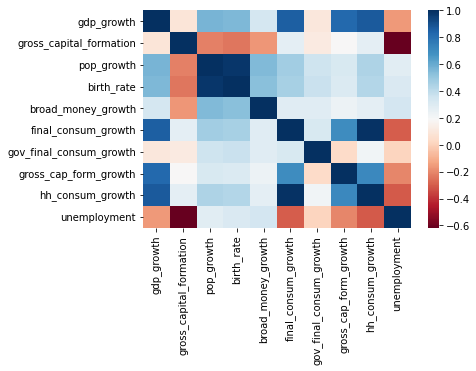

In [26]:
#Test for multicollinearity
#Multicollinearity is where one of the explanatory variables is highly correlated with another explanatory variable
#Becomes hard to distinguish the variables effect on the model and coefficient estimates become unreliable

#Print out a correlation matrix of our data frame
corr = econ_df.corr()

#Display
display(corr)

#Birth rate and population growth are 98% correlated which is very high

#Plot a heatmap
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = "RdBu" )




In [119]:
#Use systematic approach to remove variables that are highly correlated
#Use variance inflation factor (measure of increase in variance if additional variable is added)
#Look for variables with a VFI of 5 to remove in general

#Copy dataset to observe VFI in original

econ_df_before = econ_df

#GDP growth is kept in the plot observe a linear relationship between GDP and other variables but remove other highly correlated variables
econ_df_after = econ_df.drop(['gdp_growth','birth_rate', 'final_consum_growth', 'gov_final_consum_growth'], axis = 1)

#Add intercept for the linear regression
X1 = sm.tools.add_constant(econ_df_before)
X2 = sm.tools.add_constant(econ_df_after)

#Create series for both
series_before = pd.Series([variance_inflation_factor(X1.values, i ) for i in range(X1.shape[1])], index = X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i ) for i in range(X2.shape[1])], index = X2.columns)

#Display the series before
print("DATA BEFORE")
print('-'*100)
display(series_before)

#Display the series after
print("DATA AFTER")
print('-'*100)
display(series_after)

DATA BEFORE
----------------------------------------------------------------------------------------------------


const                       314.550195
gdp_growth                    9.807879
gross_capital_formation       2.430057
pop_growth                   25.759263
birth_rate                   26.174368
broad_money_growth            1.633079
final_consum_growth        2305.724583
gov_final_consum_growth      32.527332
gross_cap_form_growth         3.796420
hh_consum_growth           2129.093634
unemployment                  2.800008
dtype: float64

DATA AFTER
----------------------------------------------------------------------------------------------------


const                      211.518935
gdp_growth                   9.021724
gross_capital_formation      1.791432
pop_growth                   2.320451
broad_money_growth           1.574192
gross_cap_form_growth        3.639464
hh_consum_growth             4.996304
unemployment                 2.086003
dtype: float64

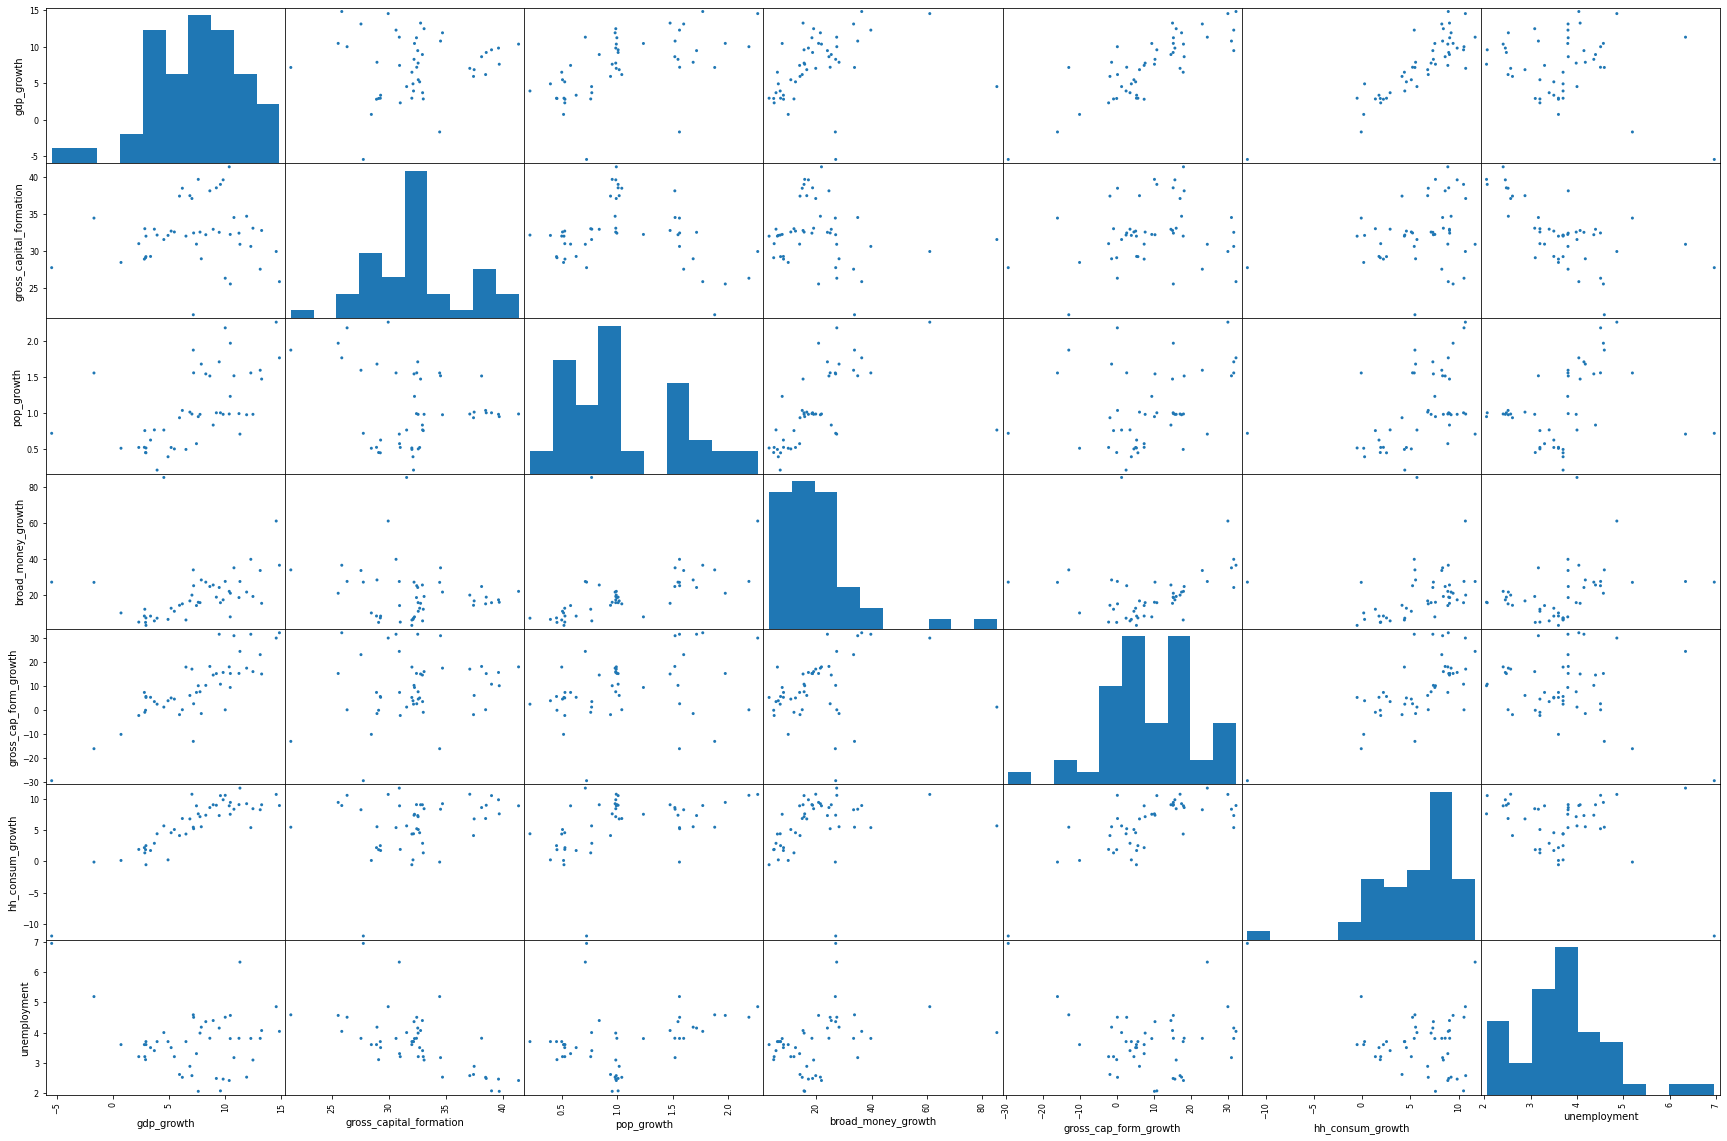

In [120]:
#Define the plot
pd.plotting.scatter_matrix(econ_df_after, alpha = 1, figsize = (30,20))

#Show plot
#GDP Growth is kept in the plot to observe the linear relationship
plt.show()

In [40]:
# get the summary
desc_df = econ_df.describe()

# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

# display it
desc_df

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.280315,32.433236,1.058072,16.340896,20.426621,5.820239,5.419214,8.965681,5.879176,3.678096
std,4.209306,4.136932,0.514039,6.814683,14.748442,3.627444,2.622254,12.629912,4.227720,0.968616
min,-5.471219,21.404761,0.211998,7.900000,2.980690,-9.288825,0.560957,-29.403255,-11.894309,2.048000
25%,4.374899,29.776910,0.615602,9.950000,10.586461,3.591334,3.384407,2.114078,3.825773,3.150475
50%,7.513471,32.335229,0.985132,15.150000,17.807598,6.531163,5.056509,7.431966,6.999971,3.700000
75%,10.376191,34.474874,1.525765,21.750000,26.923837,8.179037,7.188470,16.210283,8.938837,4.088500
max,14.827554,41.374062,2.263434,31.200000,85.203081,10.834413,11.742807,32.098276,11.711835,6.963000
+3_std,19.908232,44.844034,2.600188,36.784945,64.671947,16.702571,13.285976,46.855416,18.562336,6.583944
-3_std,-5.347602,20.022439,-0.484044,-4.103153,-23.818705,-5.062092,-2.447547,-28.924054,-6.803985,0.772247


In [41]:
#Filter outliers
econ_remove_df = econ_df[(np.abs(stats.zscore(econ_df))< 3).all(axis = 1)]

#What rows are removed? None
#The outliers are as a result of 1998 Asian financial crisis and 2001 dot com bubble and will not be removed since they are reasonable values that took place
econ_df.index.difference(econ_remove_df.index)

Int64Index([1998, 2001], dtype='int64', name='Year')

In [71]:
#Define input and output variable

econ_df_after = econ_df.drop(['birth_rate', 'final_consum_growth','gov_final_consum_growth'], axis = 1)

X = econ_df_after.drop('gdp_growth', axis = 1)
Y = econ_df_after[['gdp_growth']]

#Split dataset into training and testing portion
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)

#Create an instance of the model
regression_model = LinearRegression()

#Fit the model
regression_model.fit(X_train, y_train)


LinearRegression()

In [72]:
#Grab intercept and coef
intercept = regression_model.intercept_[0]
coef = regression_model.coef_[0][0]

print("The intercept for the model is  {:.4}".format(intercept))
print("-"*100)

#Loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))
    

#Intercept term is the value of the dependent variable when all independent variables are 0
#For example, if all indepdent variables are 0, then the GDP growth is 6.482%
#If we look at population growth while holding everything else constant, a 1 unit increase in population growth would lead to 1.7% in GDP growth



The intercept for the model is  6.482
----------------------------------------------------------------------------------------------------
The Coefficient for gross_capital_formation is -0.14
The Coefficient for pop_growth is 1.7
The Coefficient for broad_money_growth is -0.0093
The Coefficient for gross_cap_form_growth is 0.14
The Coefficient for hh_consum_growth is 0.51
The Coefficient for unemployment is -0.17


In [74]:
#Get multiple predictions
y_predict = regression_model.predict(X_test)

#Show first 5 values
y_predict[:5]

array([[ 8.1574452 ],
       [ 5.98741325],
       [ 5.53835569],
       [ 4.40731514],
       [12.34926384]])

In [81]:
#Evaluate the model
#1. Regression residuals must be normally distributed
#2. Residuals are homoskedastic
#3. Absence of multicollinearity (addressed above)
#4. No autocorrelation

#Define input
X2 = sm.add_constant(X)

#Create OLS model
model = sm.OLS(Y,X2)

#Fit the data
est = model.fit()

In [96]:
#Check for heteroskedasticity
#Heteroskedasticity causes coefficients to be less precise. Lower precision increases likelihood that the coefficient estimates are further from the correct population value
#Heterskedasticity causes p-values that are lower than they should be causing false conclusions about statistically significant variables

#Check using both Breusch-Pagan test and White test

#Running White's test
_, pval, _, f_pval = diag.het_white(est.resid, est.model.exog)
print(pval, f_pval)
print("-" * 100)

#Print results for White's test
if pval > 0.05:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity. \n")
    
else:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity. \n")
    


#Run the Breusch-Pagan test
_, pval, _, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print("-" * 100)


#Print resutls for Breusch-Pagan test
if pval > 0.05:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity.")

else:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity.")

0.5240521754470464 0.6394122086767976
----------------------------------------------------------------------------------------------------
For the White's Test
The p-value was 0.5241
We fail to reject the null hypthoesis, so there is no heterosecdasticity. 

0.6715411000621636 0.7071510723097063
----------------------------------------------------------------------------------------------------
For the Breusch-Pagan's Test
The p-value was 0.6715
We fail to reject the null hypthoesis, so there is no heterosecdasticity.


The number of lags will be 9
----------------------------------------------------------------------------------------------------
The lowest p-value found was 0.1029
We fail to reject the null hypthoesis, so there is no autocorrelation.
----------------------------------------------------------------------------------------------------


C:\Users\akcha\anaconda3\envs\myydemo\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


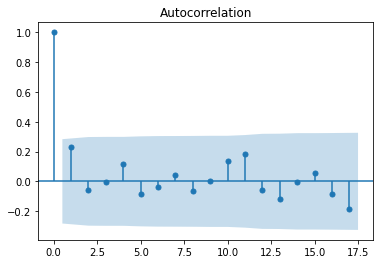

In [109]:
#Checking for autocorrelation
#Autocorrelation means that the values of the series can be predicted based on preceding values which can lead to misleading p-values and that the model may not be accurate


#Use Ljung-Box test to test for autocorrelation  where null hypothesis is H0: Data are random vs. alternate H1: Data are not random

#Calculate lag. For non-seasonal time series, lag is usually calculated as min(10, num_obs // 5) 
lag = min(10,(len(X))//5)
print('The number of lags will be {}'.format(lag))
print('-'*100)

#Perform Ljung-Box test
test_results = diag.acorr_ljungbox(est.resid, lags = lag)

#Grab the p-values and the test statistics
ibvalue, p_val = test_results

#Print the results of the test
if min(p_val) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We fail to reject the null hypthoesis, so there is no autocorrelation.")
    print('-'*100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We reject the null hypthoesis, so there is autocorrelation.")
    print('-'*100)

# plot autocorrelation
sm.graphics.tsa.plot_acf(est.resid)
plt.show()

C:\Users\akcha\anaconda3\envs\myydemo\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


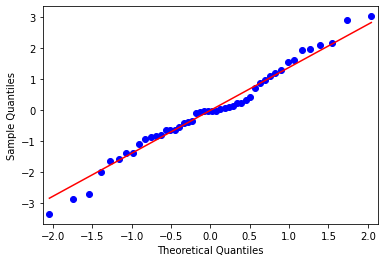

-5.116277771814263e-15

In [108]:
#Check for normally distributed residuals
sm.qqplot(est.resid, line = 's')
pylab.show()

#Residuals look to be normally distributed 

#Check mean of residuals is approx. 0
mean_residuals = sum(est.resid) / len(est.resid)
mean_residuals

In [110]:
#Measures of error
#MAE = Mean absolute error. Mean of absolute value of errors. Provides an idea of magnitude of errors but no sense of direction
#MSE = Mean Squared Error. More popular than MAE because it "punishes" more significant errors
#RMSE = square root of the mean of squared errors. RMSE is more favored because it allows us to interpret the output in y-units

#Calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

#Calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

#Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

#Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 0.544
MAE 0.525
RMSE 0.738


In [111]:
#Calculate R-squared to assess fit of data. Higher R-squared, the better the data fit
#However, a limitation is that R-square increases as the number of features increase and so the adjusted R-squared may be more appropriate
#Adjusted R-squared will be calculated in the summary below
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.9


In [112]:
#Construct 95% confidence interval
est.conf_int()

,0,1
const,-0.381201,11.818756
gross_capital_formation,-0.250172,0.027043
pop_growth,0.551738,2.930118
broad_money_growth,-0.041855,0.033300
gross_cap_form_growth,0.089353,0.189755
hh_consum_growth,0.318459,0.667406
unemployment,-0.852968,0.459314


In [113]:
#Estimate p-values
est.pvalues

#Based on p-vaules, gross capital formation, unemployment, and broad money growth come out as insignificant variables

const                      0.065385
gross_capital_formation    0.111715
pop_growth                 0.005141
broad_money_growth         0.819314
gross_cap_form_growth      0.000002
hh_consum_growth           0.000001
unemployment               0.547977
dtype: float64

In [114]:
#Create summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     54.82
Date:                Sat, 04 Sep 2021   Prob (F-statistic):           5.05e-18
Time:                        18:57:57   Log-Likelihood:                -83.803
No. Observations:                  48   AIC:                             181.6
Df Residuals:                      41   BIC:                             194.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [122]:
#Remove insignificant variables by defining input(X) and output(Y) variables
econ_df_after = econ_df.drop(['birth_rate', 'final_consum_growth', 'gov_final_consum_growth', 'gross_capital_formation', 'unemployment', 'broad_money_growth'], axis = 1)

X = econ_df_after.drop('gdp_growth', axis = 1)

Y = econ_df_after[['gdp_growth']]

#Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

#Create a Linear Regression model object
regression_model = LinearRegression()

#Pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [123]:
#Define our intput
X2 = sm.add_constant(X)

#Create a OLS model
model = sm.OLS(Y, X2)

#Fit the data
est = model.fit()

print(est.summary())

#Significant predictors include population growth, gross capital formation growth, and household consumer growth, which makes sense

                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     109.2
Date:                Sat, 04 Sep 2021   Prob (F-statistic):           2.07e-20
Time:                        19:08:08   Log-Likelihood:                -85.379
No. Observations:                  48   AIC:                             178.8
Df Residuals:                      44   BIC:                             186.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.31

C:\Users\akcha\anaconda3\envs\myydemo\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [124]:
#Save model for future use 

import pickle

#Pickle the model
with open('my_mulitlinear_regression.sav','wb') as f:
     pickle.dump(regression_model, f)

#Load it back in
with open('my_mulitlinear_regression.sav', 'rb') as pickle_file:
     regression_model_2 = pickle.load(pickle_file)

#Make a new prediction
regression_model_2.predict([X_test.loc[2002]])

array([[7.61810111]])